<a href="https://colab.research.google.com/github/TirendazAcademy/NLP-with-Transformers/blob/main/Twitter%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Perform a Twitter Sentiment Analysis with Snscrape and Hugging Face

What do football lovers think about the FIFA World Cup 2022? To find out that, I'll perform a Twitter sentiment analysis using the hashtag #WorldCup2022 on Twitter. Here are what I'll cover in this blog:

- What is Sentiment Analysis?
- What is Social Media Scraping?
- How to scrape with Snscrape?
- How to perform Twitter sentiment analysis?

Let's get started!

# How to scrape with snscrape?

First, let's take a look at how to scrape the tweets with Snscrape.

In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Creating a list to append all tweet attributes(data)
tweets = []

# Creating query
query = '#WorldCup2022 lang:en since:2022-11-21 until:2022-12-06'
q = sntwitter.TwitterSearchScraper(query)

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(q.get_items()):
    if i>5000:
        break
    tweets.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])

# Converting data to dataframe
tweets_df = pd.DataFrame(tweets, columns=["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"])
tweets_df.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,SJL_Philosopher,2022-12-05 23:59:52+00:00,0,Twitter Web App,My money is on Portugal tomorrow! Ronaldo don'...
1,Newswatch54,2022-12-05 23:59:45+00:00,0,Twitter for iPhone,@SkyNews Direct consequence of western 🌈 meddl...
2,SonnyChhohan,2022-12-05 23:59:26+00:00,0,Twitter for Android,Who is Gianni Fantino today. What an absolute ...
3,josefreireneto,2022-12-05 23:59:25+00:00,1,Twitter Web App,@PureRoyKeane Complaining about Brazil dancing...
4,JihyoConnor,2022-12-05 23:59:23+00:00,0,Twitter Web App,What do you guys think about the recent games ...


In [3]:
tweets_df.tail()

,User,Date Created,Number of Likes,Source of Tweet,Tweet
4996,yosh_jr28,2022-12-05 16:58:10+00:00,0,Twitter for Android,I want to see penalty kick #FIFAWorldCup2022 #...
4997,theduanebrown,2022-12-05 16:58:09+00:00,0,Twitter Web App,Extra soccer! 🎉\n#WorldCup2022 #SAMURAIBLUE #J...
4998,AFP,2022-12-05 16:58:08+00:00,19,TweetDeck,#UPDATE The #WorldCup2022 last-16 game between...
4999,CuppaStrategy,2022-12-05 16:58:04+00:00,0,Twitter for iPhone,Extra time - great match. Love how both teams ...
5000,Elian_Beyen,2022-12-05 16:58:01+00:00,1,Twitter for Android,IIIIVAAAANNN PERIŠIĆ \nJPN 🇯🇵 1-1 🇭🇷 ...


# Twitter Sentiment Analysis with Hugging Face

Let's import the model we'll use for Twitter sentiment analysis.

In [4]:
!pip install transformers
from transformers import pipeline
sentiment_analysis = pipeline(model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


After that let's find out the sentiment in each tweet with the for loop.

In [5]:
# Creating a list to append all tweet attributes(data)
tweet_sa = []

# Creating query
query = '#WorldCup2022 lang:en until:2022-12-06 since:2022-11-10 '
q = sntwitter.TwitterSearchScraper(query)

# Predicting the sentiments of tweets
for i,tweet in enumerate(q.get_items()):
    if i>5000:
        break
    content = tweet.content
    sentiment = sentiment_analysis(content)
    tweet_sa.append({'tweet': content, 'sentiment': sentiment[0]['label']})

Let's convert data into a dataframe.

In [9]:
import pandas as pd
pd.set_option('max_colwidth', None)

# Converting data to dataframe
df = pd.DataFrame(tweet_sa)
df.head()

,tweet,sentiment
0,My money is on Portugal tomorrow! Ronaldo don't let me down I need yall to get to the semifinals! #WorldCup2022,positive
1,@SkyNews Direct consequence of western 🌈 meddling in the #WorldCup2022 . Are we seeing the start of an Islamic resurgence? What’s going on? I want to hear from my viewers,negative
2,"Who is Gianni Fantino today. What an absolute Arse***e, today I am....\n\nYesterday, I was black, today I am black, tomorrow I am black, what changed? what a bastard to say this🤦🏾‍♂️Just f**k off you shi*t. #fifa #corruption #WorldCup2022",negative
3,@PureRoyKeane Complaining about Brazil dancing in WC. Are you crazy? You must blame yourself for this kind of comment!\n\n#WorldCup2022,negative
4,What do you guys think about the recent games of #WorldCup2022 . 👇\n\nThat match was shocking and interesting in a way but I'm rooting for the best that there will be. \n\n#NFT #Metaverse #LootMogul https://t.co/7iJ3T5qQbD,positive


# Data Visualization

First, let's count the number of tweets by sentiments.

In [10]:
import matplotlib.pyplot as plt

sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

sentiment
negative     972
neutral     1881
positive    2148
dtype: int64


Now let's draw a pie plot for the sentiments.

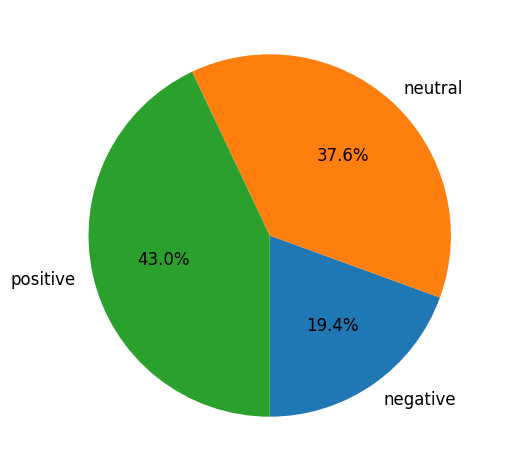

In [11]:
# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

Let's create a world cloud with positive tweets.

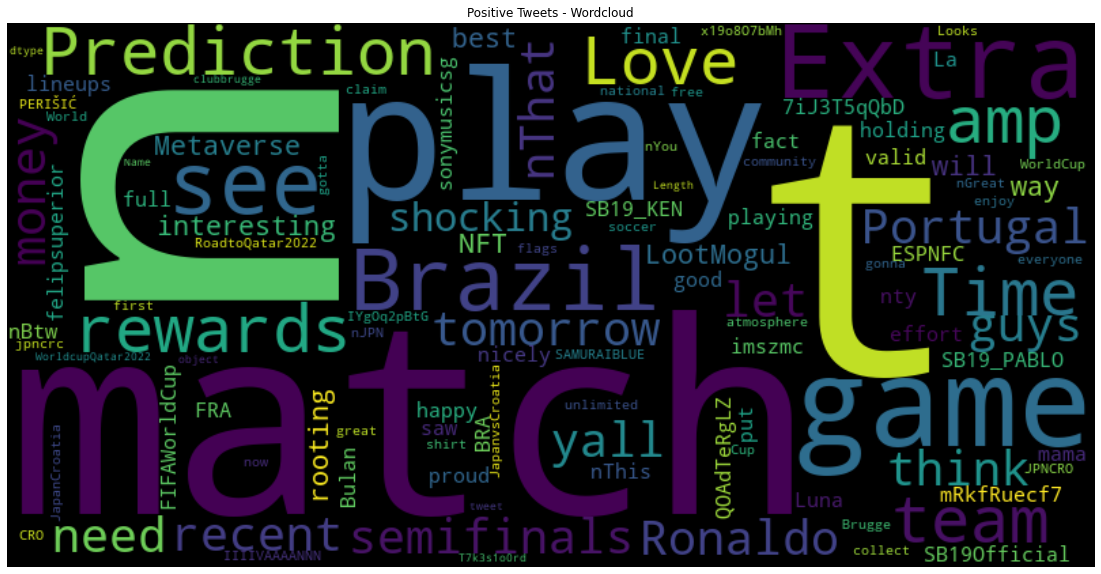

In [12]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Wordcloud with positive tweets
positive_tweets = df['tweet'][df["sentiment"] == 'positive']
stop_words = ["https", "co", "RT", "WorldCup2022"] + list(STOPWORDS)
positive_wordcloud = WordCloud(width=800, height=400, background_color="black", stopwords = stop_words).generate(str(positive_tweets))
plt.figure(figsize=[20,10])
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Next, let's create a world cloud with positive tweets.

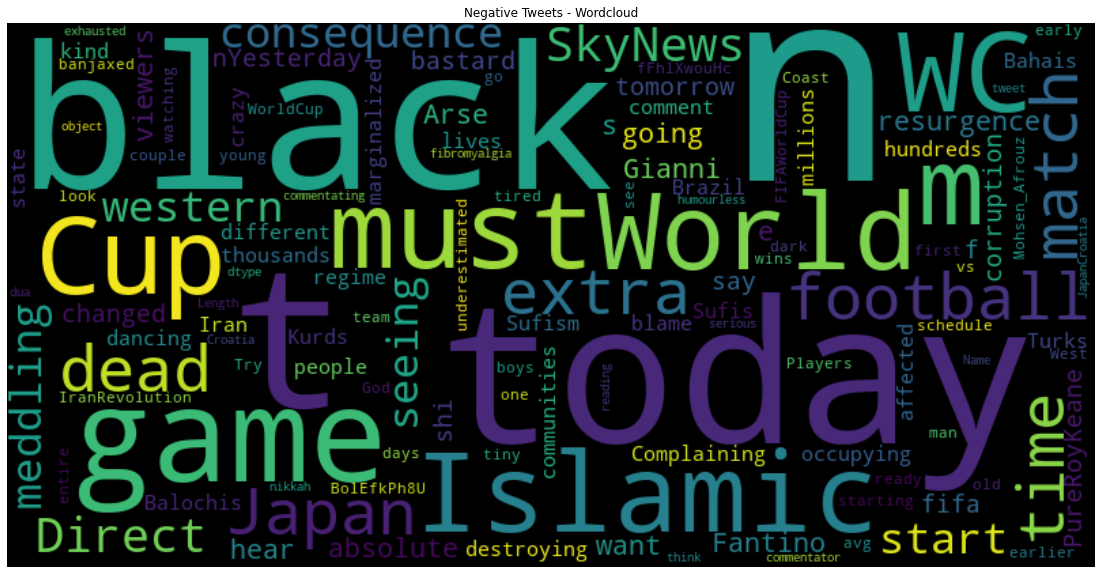

In [13]:
# Wordcloud with negative tweets
negative_tweets = df['tweet'][df["sentiment"] == 'negative']
stop_words = ["https", "co", "RT", "WorldCup2022"] + list(STOPWORDS)
negative_wordcloud = WordCloud(width=800, height=400, background_color="black", stopwords = stop_words).generate(str(negative_tweets))
plt.figure(figsize=[20,10])
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

That's it. Thanks for reading. I hope you enjoy it. You can find the notebook I used on this blog here. Don't forget to follow us on [YouTube](https://youtube.com/tirendazacademy) | [Twitter](https://twitter.com/TirendazAcademy) | [Instagram](https://www.instagram.com/tirendazacademy/) | [TikTok](https://www.tiktok.com/@tirendazacademy) 👍